# Optimizing Instagram Ads with Logistic Regression

**IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


**IMPORTING THE DATSET**

In [ ]:
data_set = pd.read_csv("/content/drive/MyDrive/PREPINSTA /MACHINE LEARNING /4. CLASSIFICATION /DATASET /Instagram Ads Logistic Regressi.csv")
data_set

,Age,Mobile Phone,Purchased
0,15,6334,0
1,28,6667,0
2,20,14334,0
3,21,19000,0
4,15,25334,0
...,...,...,...
194,28,26334,0
195,34,43000,1
196,42,11334,1
197,37,16667,1


**DIFFRENTIATING THE DEPENDENT AND INDEPENDENT VALUES**

In [ ]:
X = data_set.iloc[:, :-1].values
y = data_set.iloc[:,-1].values
print(X)
print(y)

[[   15  6334]
 [   28  6667]
 [   20 14334]
 [   21 19000]
 [   15 25334]
 [   21 19334]
 [   21 28000]
 [   25 50000]
 [   20 11000]
 [   28 21667]
 [   20 26667]
 [   26 17000]
 [   28 36000]
 [   18  6667]
 [   20 26334]
 [   21 18000]
 [   24 45000]
 [   24 29667]
 [   19 10667]
 [   14 14667]
 [   23 27667]
 [   28  7667]
 [   21 19334]
 [   19 18334]
 [   18 16000]
 [   22 26334]
 [   17  6000]
 [   25 39000]
 [   21  6667]
 [   20 29000]
 [   18 22000]
 [   25 40000]
 [   17 21000]
 [   24 22667]
 [   20 26667]
 [   19  9000]
 [   16  7667]
 [   26 37667]
 [   25  6000]
 [   27 37334]
 [   24 38667]
 [   20  5000]
 [   23  9334]
 [   23 27667]
 [   26 49667]
 [   15  7000]
 [   16 24000]
 [   20 11667]
 [   21 29667]
 [   20 28667]
 [   30 26667]
 [   31 23667]
 [   29 23667]
 [   20 30000]
 [   29 11000]
 [   17 18334]
 [   28 23667]
 [   23 49334]
 [   23 15667]
 [   16 29334]
 [   27 38334]
 [   20 39334]
 [   27 14334]
 [   27 24000]
 [   18  9334]
 [   28 15667]
 [   20  7

**SPLITING THE DATA INTO TRAINING AND TESTING DATA**

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42 )

**Feature scaling**

In [ ]:
 # BECAUSE PHONE IS LARGE VALUE AND
 # AGE IS SMALL VALUE ]
 # SO WE WILL CONVERT THIS EVALUES INTO SMALLER VALUES

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[ 0.30645937 -0.72727353]
 [-0.55054887 -1.66795146]
 [-1.40755711 -0.83799034]
 [ 0.55131887  1.5136215 ]
 [ 0.30645937 -0.47828519]
 [-1.16269761  0.24095912]
 [-1.8972761  -0.94862416]
 [ 1.04103786 -0.11866304]
 [-0.06082987 -0.72727353]
 [ 0.06159987 -0.5336436 ]
 [-0.18325962 -0.20165915]
 [-1.04026786 -0.56128131]
 [-0.18325962 -0.78263194]
 [ 0.79617836  0.01969148]
 [-0.18325962 -0.56128131]
 [ 0.30645937 -0.09102533]
 [ 2.26533534  0.8219319 ]
 [ 0.30645937 -0.50600589]
 [ 1.53075685 -1.2252502 ]
 [ 0.79617836  1.07092024]
 [ 0.91860811  1.81788525]
 [-0.55054887  1.15391635]
 [-0.18325962  0.8219319 ]
 [-1.28512736 -1.41896313]
 [ 0.79617836  0.10268759]
 [-0.79540836 -1.39124243]
 [-0.79540836 -0.97626187]
 [-0.18325962 -0.17402145]
 [-0.18325962  1.81788525]
 [ 0.18402962 -0.20165915]
 [-0.18325962 -0.50600589]
 [-0.06082987 -0.00802922]
 [-1.16269761 -1.75094758]
 [-0.06082987  0.04732919]
 [ 0.42888912  0.04732919]
 [-1.52998685 -1.66795146]
 [ 0.30645937 -0.58900201]
 

In [ ]:
print(X_test )

[[ 1.16346761 -0.11866304]
 [-1.04026786 -0.67199812]
 [ 0.18402962 -1.00398257]
 [ 1.6531866   0.71129808]
 [-0.30568937 -0.97626187]
 [ 1.16346761  0.29631752]
 [-1.6524166   0.10268759]
 [-1.28512736 -1.52959695]
 [ 1.77561635  0.71129808]
 [ 0.06159987 -0.78263194]
 [ 0.18402962 -0.09102533]
 [ 0.06159987 -0.20165915]
 [-0.18325962 -0.86562805]
 [-1.40755711 -0.34001367]
 [ 0.91860811 -0.86562805]
 [ 2.02047585  0.62830197]
 [-1.52998685 -0.64427742]
 [-0.30568937  1.01564483]
 [ 0.79617836 -1.55723465]
 [ 1.04103786  1.65189302]
 [-0.67297862  1.56889691]
 [ 0.30645937 -0.72727353]
 [ 1.16346761 -0.36765138]
 [ 0.91860811  0.96028642]
 [-1.16269761 -1.55723465]
 [ 1.04103786  1.12627864]
 [ 1.8980461  -0.11866304]
 [-0.18325962 -0.36765138]
 [-1.28512736 -1.28060861]
 [ 1.04103786  1.5412592 ]
 [ 0.42888912 -0.36765138]
 [-1.77484635 -1.58495535]
 [ 1.8980461  -0.50600589]
 [ 1.77561635 -1.08697868]
 [-0.18325962  0.35167593]
 [-0.42811912 -1.03162027]
 [ 0.67374861 -1.08697868]
 

**LOGISTIC REGRESSION TRAINING ON TRAINING SET**

In [ ]:
from sklearn.linear_model import LogisticRegression
# we will use the word classifier here because we are classifieng
classifier = LogisticRegression()
classifier.fit(X_train , y_train)

LogisticRegression()

**PREDICTING THE NEW RESULT**

In [ ]:
# we are predicting for the value
# here befor this we have applied feature scaling so we need to take values regarding that but ,
# in the befor codes we have used the sc.inverse() , reshape(-1,1) etc
# now we will use the sc.transform

print(classifier.predict(sc.transform([[28,4890]])))

[0]


**PREDICTING ALL TEST_RESULT**

In [ ]:
# WE WILL PREDICT ALL OUR TESTiNG RESULT

# ALSO PRINT(WHAT OUR DATA SAYS )
# ALSO PRINT(WHAT OUR MACHINE LEARNING ALGORITHUM SAYS)

y_pred = classifier.predict(X_test)

# now we will concatinate the
# ALSO PRINT(WHAT OUR DATA SAYS )
# ALSO PRINT(WHAT OUR MACHINE LEARNING ALGORITHUM SAYS)

print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))



[[1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]]


**Confusion matrix**

In [ ]:
# we we will use confusion matrix for getting the total summary of the above datset
# it will use true positive and true negetives for this

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
print(cm)

# we will see the accuracy here
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test , y_pred)
print(accuracy)


[[23  2]
 [ 3 12]]
0.875


**visualising logistic regression for training dataset**

<ipython-input-12-c1be0c587e0a>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


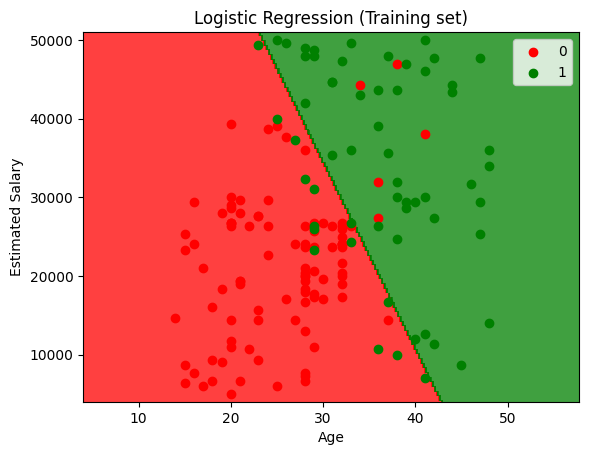

In [ ]:
# code given by prepinsta

from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

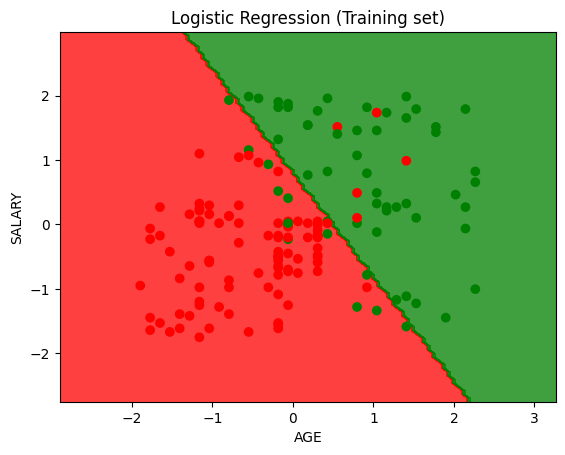

In [ ]:
# code given by chatgpt


import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained your logistic regression model named 'classifier'
# Assuming X_train and y_train are your scaled training features and labels respectively

# Define meshgrid for plotting decision boundary
X1, X2 = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, num=100),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, num=100))
X_grid = np.c_[X1.ravel(), X2.ravel()]

# Predictions on meshgrid points
y_pred_grid = classifier.predict(X_grid).reshape(X1.shape)

# Plot the decision boundary
plt.contourf(X1, X2, y_pred_grid, alpha=0.75, cmap=ListedColormap(('red', 'green')))

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(('red', 'green')))
plt.title('Logistic Regression (Training set)')
plt.xlabel('AGE')
plt.ylabel('SALARY')
plt.show()


**VISUALIZING FOR THE TESTING DATASET**

<ipython-input-14-23c9d6c58007>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


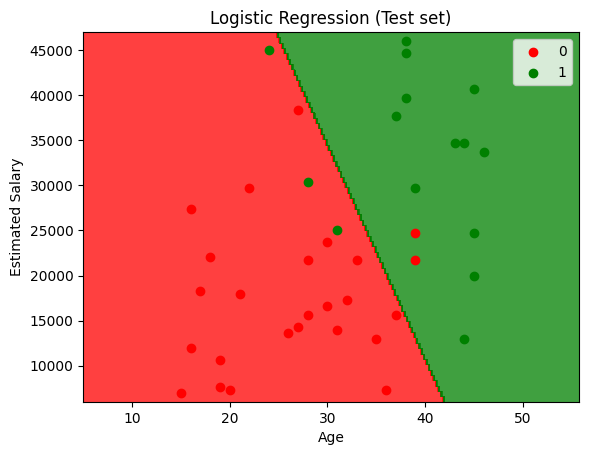

In [ ]:
# CODE GIVEN BY THE PREPINSTA




from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()